## Gathering of data

In [584]:
import pandas as pd
from pyjstat import pyjstat
import requests
import matplotlib.pyplot as plt
import numpy as np

In [585]:
kveite_prices = pd.read_excel("data/Fersk_kveite.xlsx", skiprows=4)

In [586]:
kveite_prices = kveite_prices.tail(-13)
kveite_prices = kveite_prices[kveite_prices.KalenderUkeBeskrivelse != 53]
kveite_prices = kveite_prices.reset_index(drop=True)
kveite_prices

,OMSETNING_ÅR,KalenderUkeBeskrivelse,100+ KG,"-20,0 KG",20-40 KG,"-4,0 KG","-40,0 KG",40+ KG,40-60 KG,60+ KG,60-99 KG,Totalsum
0,2013,14,30.000000,NaN,NaN,NaN,49.764852,39.609989,NaN,35.000000,NaN,47.577612
1,2013,15,30.000000,NaN,NaN,NaN,50.153008,39.726203,NaN,34.290482,NaN,47.924958
2,2013,16,30.000000,NaN,NaN,NaN,49.744720,40.588599,NaN,35.190833,NaN,47.092639
3,2013,17,26.851158,NaN,NaN,NaN,49.767285,39.056457,NaN,34.354839,NaN,47.193296
4,2013,18,30.000000,NaN,NaN,25.000000,50.088888,39.478360,NaN,35.000000,NaN,48.987917
...,...,...,...,...,...,...,...,...,...,...,...,...
502,2022,48,NaN,80.780069,80.787690,10.117788,NaN,NaN,76.049203,60.392543,NaN,76.897925
503,2022,49,NaN,81.475444,73.848064,3.099337,NaN,NaN,74.776444,61.019040,NaN,73.642666
504,2022,50,NaN,81.294761,76.470526,5.151143,NaN,NaN,74.809421,59.513327,NaN,73.193629
505,2022,51,NaN,79.262251,77.425490,NaN,NaN,NaN,79.891625,63.484762,NaN,74.156841


In [587]:
salmon_prices = pd.read_excel("data/nasdaq.with.weight.xls", skiprows=1)

In [588]:
salmon_prices = salmon_prices.head(-5)
salmon_prices = salmon_prices[salmon_prices.Week != 53]
salmon_prices = salmon_prices.reset_index(drop=True)
salmon_prices

,Year,Week,3-4 Kg,4-5 Kg,5-6 Kg,3-4 Kg Weight,4-5 Kg Weight,5-6 Kg weight,Nasdaq 3-6 kg,Deduction Factor,Nasdaq 3-6 kg in FPI (FCA Oslo),Currency,Nasdaq 3-6 kg in FPI (EUR)
0,2013.0,14.0,39.70,40.53,40.85,0.3,0.4,0.3,40.38,-0.75,39.63,7.4500,5.42
1,2013.0,15.0,41.75,42.91,43.17,0.3,0.4,0.3,42.64,-0.75,41.89,7.4800,5.70
2,2013.0,16.0,42.73,43.94,44.74,0.3,0.4,0.3,43.82,-0.75,43.07,7.5500,5.80
3,2013.0,17.0,42.54,43.54,44.23,0.3,0.4,0.3,43.45,-0.75,42.70,7.6500,5.68
4,2013.0,18.0,41.52,42.76,43.34,0.3,0.4,0.3,42.56,-0.75,41.81,7.6000,5.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,2022.0,48.0,79.12,81.59,87.05,0.3,0.4,0.3,82.49,0.00,82.49,10.2942,8.01
503,2022.0,49.0,76.47,78.43,82.38,0.3,0.4,0.3,79.03,0.00,79.03,10.4651,7.55
504,2022.0,50.0,74.60,77.80,81.83,0.3,0.4,0.3,78.05,0.00,78.05,10.4539,7.47
505,2022.0,51.0,72.88,75.19,79.62,0.3,0.4,0.3,75.83,0.00,75.83,10.4639,7.25


In [589]:
torsk_prices = pd.read_excel("data/Fersk_torsk.xlsx", skiprows=4)

In [590]:
torsk_prices = torsk_prices.tail(-13)
torsk_prices = torsk_prices[torsk_prices.KalenderUkeBeskrivelse != 53]
torsk_prices = torsk_prices.reset_index(drop=True)
torsk_prices

,OMSETNING_ÅR,KalenderUkeBeskrivelse,"-1,0 KG","1,0-2,5 KG","2,5+ KG","6,0+ KG",IKKE OPPGITT,Totalsum
0,2013,14,8.000000,9.630678,10.420998,13.256689,NaN,10.754267
1,2013,15,8.000000,9.826467,10.500865,13.346171,NaN,10.800751
2,2013,16,8.006991,9.537936,10.553869,13.249404,NaN,10.774089
3,2013,17,8.049334,9.585848,10.353178,13.247026,NaN,10.569605
4,2013,18,7.992742,9.666591,10.530068,13.311289,NaN,10.605343
...,...,...,...,...,...,...,...,...
502,2022,48,33.997856,37.492907,40.327392,38.023946,NaN,39.417280
503,2022,49,31.898066,34.741681,39.933947,44.288580,NaN,39.071706
504,2022,50,30.683480,36.331698,48.045620,37.875704,NaN,42.701713
505,2022,51,33.079122,37.545356,47.870999,47.814482,NaN,43.652968


In [591]:
#KPI månedlig fra SSB:
POST_URL = 'https://data.ssb.no/api/v0/no/table/05327/'

In [592]:
payload = {
  "query": [
    {
      "code": "Konsumgrp",
      "selection": {
        "filter": "item",
        "values": [
          "JA_TOTAL"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "KPIJustIndMnd"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2013M03",
          "2013M04",
          "2013M05",
          "2013M06",
          "2013M07",
          "2013M08",
          "2013M09",
          "2013M10",
          "2013M11",
          "2013M12",
          "2014M01",
          "2014M02",
          "2014M03",
          "2014M04",
          "2014M05",
          "2014M06",
          "2014M07",
          "2014M08",
          "2014M09",
          "2014M10",
          "2014M11",
          "2014M12",
          "2015M01",
          "2015M02",
          "2015M03",
          "2015M04",
          "2015M05",
          "2015M06",
          "2015M07",
          "2015M08",
          "2015M09",
          "2015M10",
          "2015M11",
          "2015M12",
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12",
          "2023M01",
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [593]:
result = requests.post(POST_URL, json = payload)

In [594]:
dataset = pyjstat.Dataset.read(result.text)
KPI_JA = dataset.write('dataframe')

In [595]:
KPI_JA

,konsumgruppe,statistikkvariabel,måned,value
0,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2013M03,95.4
1,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2013M04,96.0
2,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2013M05,96.1
3,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2013M06,95.7
4,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2013M07,96.1
...,...,...,...,...
114,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2022M09,129.5
115,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2022M10,128.8
116,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2022M11,128.4
117,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2022M12,129.6


In [596]:
KPI = KPI_JA.value.head(-1)
KPI = pd.DataFrame(data=KPI)
KPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   118 non-null    float64
dtypes: float64(1)
memory usage: 1.0 KB


In [597]:
KPI

,value
0,95.4
1,96.0
2,96.1
3,95.7
4,96.1
...,...
113,127.2
114,129.5
115,128.8
116,128.4


In [598]:
dato_kpi = pd.date_range(start = '2013-03-01', end = '2022-12-31', freq = "m")

In [599]:
KPI = KPI.set_index(dato_kpi)

In [600]:
KPI

,value
2013-03-31,95.4
2013-04-30,96.0
2013-05-31,96.1
2013-06-30,95.7
2013-07-31,96.1
...,...
2022-08-31,127.2
2022-09-30,129.5
2022-10-31,128.8
2022-11-30,128.4


In [601]:
start_date = KPI.index.min() - pd.DateOffset(day=1)
end_date = KPI.index.max() + pd.DateOffset(day=31)

In [602]:
dates = pd.date_range(start_date, end_date, freq='w')
#dates.name = 'date'
KPI = KPI.reindex(dates, method='bfill')

In [603]:
KPI_mean = KPI.expanding().mean()

In [604]:
KPI

,value
2013-03-03,95.4
2013-03-10,95.4
2013-03-17,95.4
2013-03-24,95.4
2013-03-31,95.4
...,...
2022-11-27,128.4
2022-12-04,129.6
2022-12-11,129.6
2022-12-18,129.6


In [605]:
KPI.columns

Index(['value'], dtype='object')

In [606]:
KPI = KPI.rolling(window=4).mean().round(2)

In [607]:
KPI

,value
2013-03-03,NaN
2013-03-10,NaN
2013-03-17,NaN
2013-03-24,95.4
2013-03-31,95.4
...,...
2022-11-27,128.4
2022-12-04,128.7
2022-12-11,129.0
2022-12-18,129.3


In [608]:
KPI = KPI.tail(-5)
KPI = KPI.head(-1)

In [609]:
KPI

,value
2013-04-07,95.55
2013-04-14,95.70
2013-04-21,95.85
2013-04-28,96.00
2013-05-05,96.02
...,...
2022-11-20,128.50
2022-11-27,128.40
2022-12-04,128.70
2022-12-11,129.00


In [610]:
var_set = pd.DataFrame()

In [611]:
var_set["CPI"] = KPI["value"]

In [612]:
var_set["SalmonPrice"] = salmon_prices["Nasdaq 3-6 kg in FPI (FCA Oslo)"].to_numpy()

In [613]:
var_set["CodPrice"] = torsk_prices["Totalsum"].to_numpy()

In [614]:
var_set["HalibutPrice"] = kveite_prices["Totalsum"].to_numpy()

In [615]:
var_set = var_set.reindex(columns = [col for col in var_set.columns if col != 'CPI'] + ['CPI'])

In [616]:
var_set

,SalmonPrice,CodPrice,HalibutPrice,CPI
2013-04-07,39.63,10.754267,47.577612,95.55
2013-04-14,41.89,10.800751,47.924958,95.70
2013-04-21,43.07,10.774089,47.092639,95.85
2013-04-28,42.70,10.569605,47.193296,96.00
2013-05-05,41.81,10.605343,48.987917,96.02
...,...,...,...,...
2022-11-20,82.49,39.417280,76.897925,128.50
2022-11-27,79.03,39.071706,73.642666,128.40
2022-12-04,78.05,42.701713,73.193629,128.70
2022-12-11,75.83,43.652968,74.156841,129.00


<AxesSubplot: >

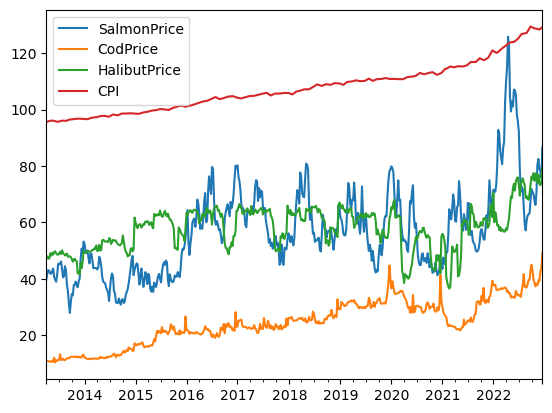

In [617]:
var_set.plot()